In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from time import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import math

### Some helper functions

In [2]:
# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    
# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.iloc[n], size_w, size_h, labels)
    plt.show()

## Load the input data set

In [3]:
train = pd.read_csv('./train.csv')
#train = pd.read_csv('train.csv')
print(train.shape)
train.sample(5)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28227,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38690,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36765,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37703,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
train.loc[0:12]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


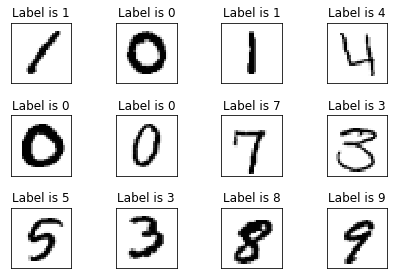

In [6]:
# Plotting first few rows
plot_slice(train[0:12])

### Prepare training and test data set

In [7]:
X_train = train.drop(['label'], axis = 1, inplace = False)

In [8]:
X_train.shape

(42000, 784)

In [9]:
y_train = train['label']

In [10]:
y_train.shape

(42000,)

In [11]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.20, random_state=4)

In [12]:
n_components = 16 # No of components for PCA
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_tr)

done in 2.338s


0.5953468176348377

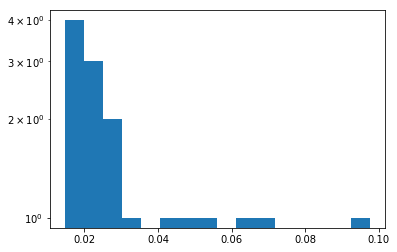

In [13]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [14]:
X_train_pca.shape

(33600, 16)

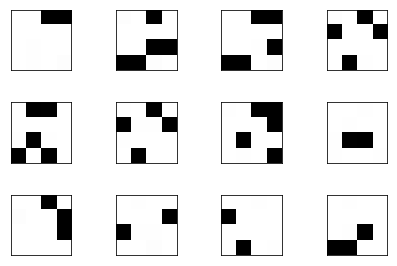

In [15]:
plot_slice(pd.DataFrame(data=X_train_pca[0:12]), size_w=4, size_h=4, labels=False)

In [16]:
param_grid = { "C" : [0.1]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y_tr)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.1s finished


0.9390178571428571
{'C': 0.1, 'gamma': 0.1}


In [17]:
param_grid = { "C" : [0.1]
              , "kernel" : ["rbf"]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y_tr)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.3s finished


0.9390178571428571
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [18]:
param_grid = { "C" : [0.1]
              , "kernel" : ["linear"]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y_tr)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.7s finished


0.8846428571428572
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [19]:
param_grid = { "C" : [0.1]
              , "kernel" : ["poly"]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y_tr)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.6s finished


0.9469047619047619
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [20]:
bp = gs.best_params_

t0 = time()
clf = SVC(C=bp['C'], kernel=bp["kernel"], gamma=bp['gamma'])
clf = clf.fit(X_train_pca, y_tr)
print("done in %0.3fs" % (time() - t0))

done in 12.253s


In [21]:
clf.score(pca.transform(X_ts), y_ts)

0.9539285714285715

In [22]:
val = pd.read_csv('./test.csv')
pred = clf.predict(pca.transform(val))

In [23]:
val['Label'] = pd.Series(pred)
val['ImageId'] = val.index +1
sub = val[['ImageId','Label']]

In [24]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [25]:
sub.to_csv('submission.csv', index=False)

## Running SVM on the whole dataset

In [26]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train1 = X_train/255

In [28]:
param_grid = { "C" : [0.1]
              , "kernel" : ["poly"]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train1, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.7min finished


0.9683571428571428
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [29]:
bp = gs.best_params_

t0 = time()
clf = SVC(C=bp['C'], kernel=bp["kernel"], gamma=bp['gamma'])
clf = clf.fit(X_train1, y_train)
print("done in %0.3fs" % (time() - t0))

done in 207.732s


In [30]:
# t0 = time()
# clf.score(X_train1, y_train)
# print("done in %0.3fs" % (time() - t0))

In [31]:
t0 = time()
val = pd.read_csv('./test.csv')
val = val/255
pred = clf.predict(val)
print("done in %0.3fs" % (time() - t0))

done in 201.358s


In [32]:
val['Label'] = pd.Series(pred)
val['ImageId'] = val.index +1
sub = val[['ImageId','Label']]

In [33]:
sub.to_csv('submission.csv', index=False)